# PL Players Popularity Prediction model
The goal of this project is to predict the number of player's wikipedia page visits base on his age, market value, team score and fpl selection index using linear regression model. 

*Dataset used in this project comes from the kaggle site: https://www.kaggle.com/datasets/mauryashubham/english-premier-league-players-dataset .*

## 1. Get the data

### Create project subdirectory for the datasets

### Download and unzip dataset file
*Currently not working because the file must be downloaded using kaggle's api otherwise it is invalid*

## 2. Format the data
The model will use only a few selected features: age, club_id(for dataset splitting operation), market value, team score and fpl selection index. The rest of the columns must be dropped.

### Load the dataset from .csv file

In [55]:
# Load dataset from .csv file as pandas dataframe
import pandas as pd
players_orig_df = pd.read_csv("Datasets/epldata_final.csv")
# Display a first few records
players_orig_df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [56]:
# get the overall info and statistics for each feature 
players_orig_df.info()
players_orig_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


### Edit the dataframe columns
Define selected columns and drop non-selected from the dataframe.

In [57]:
players_orig_df_cols = players_df.columns
# Selected columns
selected_cols = ["age", "market_value", "fpl_points", "fpl_sel", "page_views", "club_id"]
# Drop all the non-sselected columns
players_df = players_orig_df.drop(columns=[col for col in players_df_cols if col not in selected_cols])
players_df.columns

Index(['age', 'market_value', 'page_views', 'fpl_sel', 'fpl_points',
       'club_id'],
      dtype='object')

In [58]:
%matplotlib inline

### Format non-numeric columns
Convert values for the 'fpl_sel' column from string representation of a percentage to a float value

In [59]:
# Remove '%' char from a string values for 'fpl_sel' column
players_df['fpl_sel'] = players_df['fpl_sel'].str.replace("%", "")
# Convert the column type to float
players_df['fpl_sel'] = players_df['fpl_sel'].astype(float)

### Histograms for the dataset

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'market_value'}>],
       [<Axes: title={'center': 'page_views'}>,
        <Axes: title={'center': 'fpl_sel'}>],
       [<Axes: title={'center': 'fpl_points'}>,
        <Axes: title={'center': 'club_id'}>]], dtype=object)

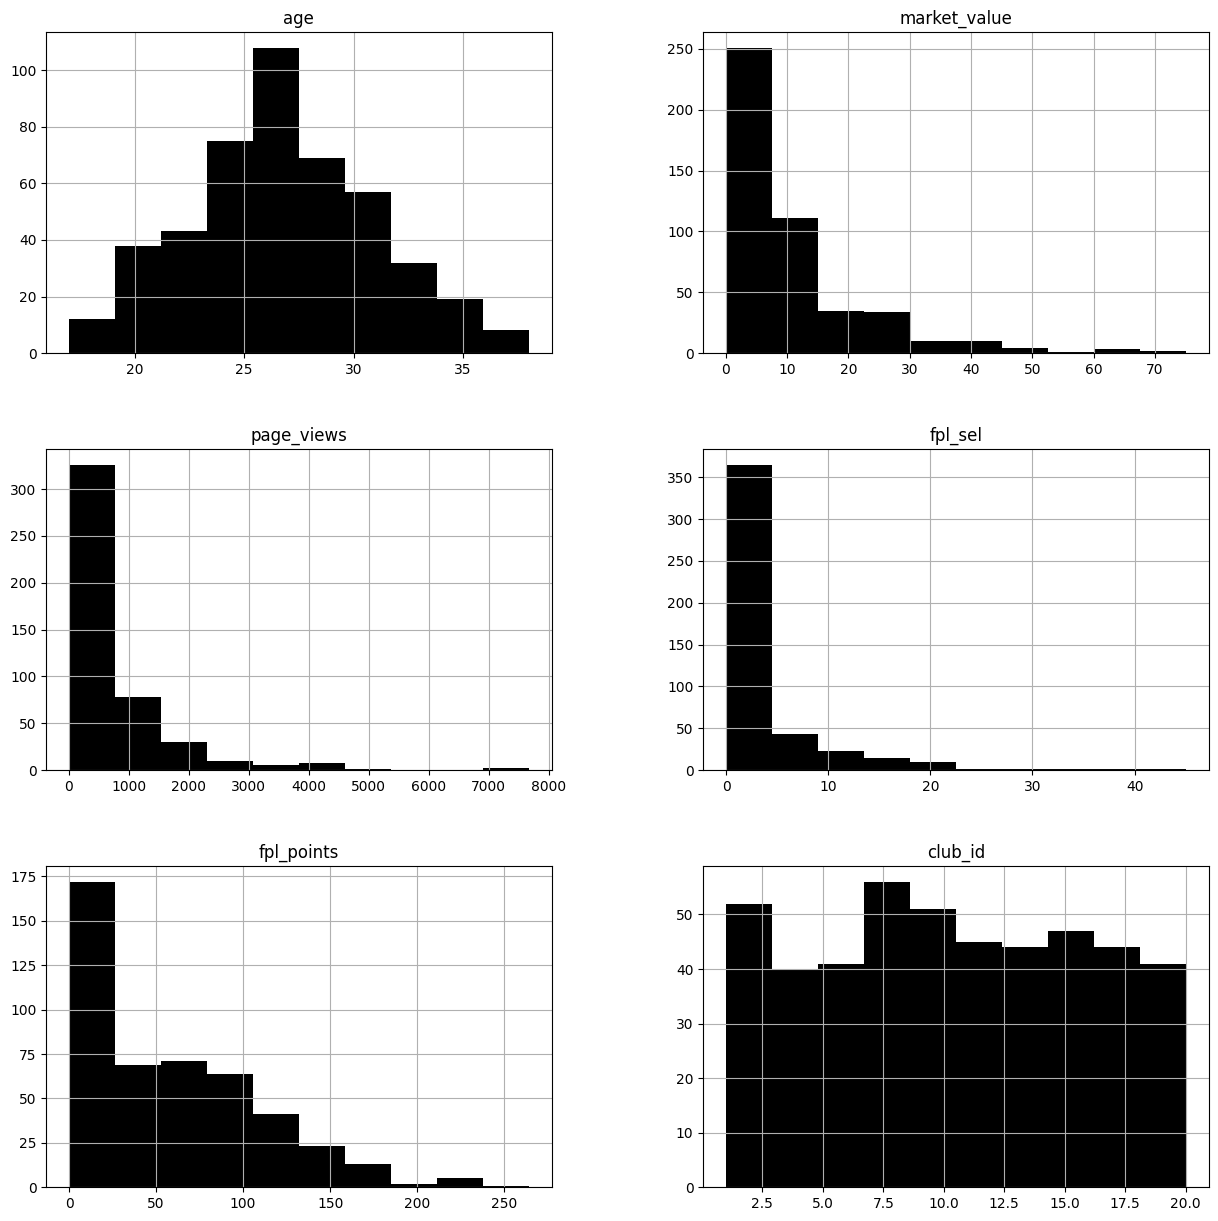

In [60]:
players_df.hist(bins=10, figsize=(15, 15), color="black") # bins = column width on a histogram

## 3. Split datasets
Split the dataset into training subset and test subset using stratisfied split method based on 'club_id' column

In [61]:
from sklearn.model_selection import StratifiedShuffleSplit
# Create stratified shuffle split object with a single split and train to test ratio 7/3
dataset_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=30)
for train_index, test_index in dataset_split.split(players_df, players_df['club_id']):
    strat_train_subset = players_df.loc[train_index]
    strat_test_subset = players_df.loc[test_index]
# Print proportions for the test subset
print("Proportions of players in clubs in the test subset ")
strat_test_subset['club_id'].value_counts()/len(strat_test_subset)

Proportions of players in clubs in the test subset 


club_id
1     0.064748
7     0.057554
16    0.057554
12    0.057554
10    0.057554
8     0.057554
14    0.050360
9     0.050360
20    0.050360
2     0.050360
3     0.050360
15    0.050360
18    0.050360
11    0.043165
19    0.043165
13    0.043165
5     0.043165
17    0.043165
6     0.043165
4     0.035971
Name: count, dtype: float64

In [62]:
# Print proportions for the dataset
print("Proportions of players in clubs in the dataset")
players_df['club_id'].value_counts()/len(players_df)

Proportions of players in clubs in the dataset


club_id
1     0.060738
8     0.060738
7     0.060738
10    0.058568
16    0.054230
12    0.054230
2     0.052061
9     0.052061
18    0.052061
14    0.049892
20    0.047722
3     0.047722
15    0.047722
6     0.045553
13    0.045553
11    0.043384
17    0.043384
5     0.043384
19    0.041215
4     0.039046
Name: count, dtype: float64

### Checking the correlation matrix for the number of page views

In [63]:
# Correlation matrix for the training subset
correlation_matrix = strat_train_subset.corr()
# Correlation matrix for the page_views feature in the training subset
correlation_matrix['page_views']

age            -0.066955
market_value    0.806276
page_views      1.000000
fpl_sel         0.564034
fpl_points      0.601222
club_id        -0.061778
Name: page_views, dtype: float64

## 4. Create model
Using sci-kit learn create linear regression model to predict the number of wikipedia page views of a player

### Fit data into linear regression function

In [64]:
# isolate numerical values and drop label feature
train_subset_num = strat_train_subset.drop(columns=["club_id", "page_views"])
# isolate label feature
label = strat_train_subset["page_views"]
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_subset_num, label)
print("The omega values calculated using scikit learn Linear Regression", model.intercept_, model.coef_)

The omega values calculated using scikit learn Linear Regression 68.77134119728146 [-1.08109409 45.5208314  14.80336272  2.3459372 ]


### Find the MSE of the linear regression in the training subset

In [65]:
from sklearn.metrics import mean_squared_error
predicted_popularity_training = model.predict(train_subset_num)
mse_train = mean_squared_error(label, predicted_popularity_training)
print("Mean_squared_error in the training set=", mse_train)
import numpy as np
# find the square root of the mean squared error
root_mean_squared_error_train = np.sqrt(mse_train)
print("Root_mean_squared_error in the training set=", root_mean_squared_error_train)

Mean_squared_error on the training set= 257140.57136099142
Root_mean_squared_error on the training set= 507.09029902078726
